In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
import matplotlib.pyplot as plt
import time
# Load earthquake data
data = pd.read_csv("/Users/themdq/Desktop/Diana/Журавлев/gui/query.csv")


In [2]:
data.tail()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
544,2023-02-17T02:11:31.842Z,1.0243,-28.0775,10.000,5.3,mww,36.0,55.0,14.543,0.88,...,2023-03-10T02:15:45.129Z,central Mid-Atlantic Ridge,earthquake,10.60,1.839,0.060,27.0,reviewed,us,us
545,2023-02-17T01:54:23.951Z,12.3097,123.6697,10.000,4.6,mb,28.0,118.0,11.251,0.78,...,2023-02-24T22:27:03.040Z,"1 km W of Umabay, Philippines",earthquake,7.35,1.840,0.109,25.0,reviewed,us,us
546,2023-02-17T01:46:34.153Z,26.5417,128.6890,29.797,5.2,mww,99.0,44.0,0.474,0.85,...,2023-03-10T01:55:30.970Z,"70 km E of Nago, Japan",earthquake,6.70,1.318,0.071,19.0,reviewed,us,us
547,2023-02-17T01:22:50.287Z,23.9454,121.4889,18.014,4.7,mb,34.0,93.0,0.247,0.92,...,2023-03-10T01:19:15.819Z,Taiwan,earthquake,2.45,4.344,0.087,41.0,reviewed,us,us
548,2023-02-17T00:35:58.501Z,39.1868,40.1479,10.000,4.6,mwr,95.0,46.0,0.873,0.84,...,2023-03-07T13:49:44.747Z,"8 km ESE of Yayladere, Turkey",earthquake,4.49,1.882,0.065,23.0,reviewed,us,us


In [3]:
features = ["latitude", "longitude", "depth",  ]
X = data[features]
y = data["mag"]

# Convert time feature to Unix timestamp
#X.loc[:, "time"] = pd.to_datetime(X["time"]).apply(lambda x: int(time.mktime(x.timetuple())))

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a random forest regression model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the test set
#X_test.loc[:, "time"] = pd.to_datetime(X_test["time"]).apply(lambda x: int(time.mktime(x.timetuple())))
y_pred = rf.predict(X_test)

# Evaluate the model's performance
print(X_test)
print(y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)

     latitude  longitude    depth
195   42.3331   144.5555   47.631
79    14.3380   -93.2086   35.000
479    1.9113    96.6141   27.722
109  -12.0577   165.8247   10.000
473   36.1588    36.0238   16.000
..        ...        ...      ...
542   50.4404  -129.6706   10.000
140  -17.8526  -178.2089  538.585
371  -16.8844  -176.9645   10.000
18   -30.4146  -176.6294   10.000
323   -4.5399   154.9101  140.307

[110 rows x 3 columns]
[5.127 4.571 4.893 4.789 4.836 4.859 4.803 4.738 4.726 4.796 4.735 4.825
 4.743 4.886 4.812 4.713 4.955 4.836 4.8   4.843 4.888 4.771 4.85  4.576
 4.508 4.921 4.759 4.754 4.744 4.969 5.118 4.635 4.761 4.645 4.818 4.808
 4.65  4.897 4.839 4.847 4.612 5.161 4.943 4.783 4.642 4.68  4.612 4.652
 4.578 4.677 4.783 4.581 5.12  4.633 5.168 4.892 4.781 5.141 4.617 4.723
 4.875 4.94  4.774 4.741 5.224 4.577 4.664 4.788 4.978 5.066 4.706 4.556
 5.047 4.984 4.804 4.688 4.636 4.735 4.658 4.771 4.771 4.636 5.037 5.011
 4.744 4.761 4.775 4.877 4.966 4.801 4.933 4.754 4.87  5.

In [4]:
X = data.loc[:, ['latitude', 'longitude', 'depth']].values
y = data['mag']


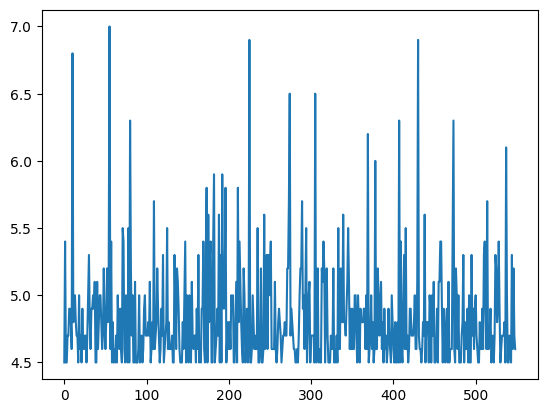

In [5]:
plt.plot(data['mag'])

In [6]:
neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(X_train, y_train)
print(neigh.predict([[42.3331,144.5555,47.631]]))
#print(neigh.predict(X_test))
#mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)

[5.23333333]
Mean squared error: 0.24894212727272774


/Users/themdq/Desktop/Diana/Журавлев/GUI/venv/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
